# Teoría, Práctica y Aplicaciones de los Elementos Finitos
## Tarea I
### Curso de Posgrado en Matemáticas-UNAM

> Profesor: Daniel Castañon Quiroz. daniel.castanon@iimas.unam.mx

> Alumno: Mario Rafael Nolasco Estrada. mnolasco@ciencias.unam.mx

# Problema 2

Aproximar numéricamente utilizando los elementos finitos de Lagrange de primer orden la solución débil del siguiente problema con valores en la frontera:

$$-u''(x)+u'(x)+u(x) = f(x),\qquad x\in D := [0,1],$$

con las condiciones de frontera $u(0) =1\ , \  u'(1) =0$.

donde $f(x)=-2e^x+2(1-x)e^x+(1-x)^2e^x$. 

* Observar que $u(x)=(1-x)^2e^x$ es la solución del problema.
* Obtener entonces la tasa de convergencia para el error $e:=u_h-u$ en la norma $L^2(D)$ y la seminorma $H^1(D)$ para $N=10, 20, 40, 80, 160$; donde $N$ es el número de subintervalos que dividen a $D$.

## Solución

Dada la partición del intervalo $[a,b]$ en $n$ intervalos: 

$$a= x_1 < x_2 < x_3 < \ldots < x_n < x_{n+1}=b$$

Definimos: 

$$h_i = x_{i+1}-x_i \quad I_i : = x\in [x_i, x_{i+1} ]$$

Tomamos los elementos finitos de Lagrange de orden uno: 
$$\left\lbrace \phi_1, \phi_2, \ldots, \phi_{n+1}  \right\rbrace $$

donde 

$$ \phi_i(x) := \begin{cases}  \frac{x-x_{i-1}}{h_{i-1}}  & x\in [x_{i-1},x_i]= I_{i-1} \\ 
1-\frac{x-x_{i}}{h_{i}}  & x\in [x_{i},x_{i+1}]= I_{i}\\ 
0 & \text{ otro caso}\end{cases} $$

con derivada:

$$\phi_i(x)' := \begin{cases}  \frac{1}{h_{i-1}}  & x\in I_{i-1} \\
-\frac{1}{h_{i}}  & x\in I_{i}\\ 
0 & \text{ otro caso}\end{cases} $$

Entonces el problema se convierte en 

$$a(u,v)=(f,v)$$

con

$$a(u,v)=\int_{D} u'v'+u'v+uv =  \quad (f,v) =\int_{D} f(x) v(x)dx  $$

Ahora si tomamos $u$ y $v$ tales que: 

$$u = \sum_{j=1}^{n+1} u_j \phi_j\quad v = \sum_{i=1}^{n+1} v_i \phi_i $$ 


$a(u,v)-(f,v)=0$ se convierte en:

$$\sum_{i=1}^{n+1} v_i \left [ \sum_{j=1}^{n+1}\int_{D} \left( \phi_j'\phi_i'+\phi_j'\phi_i+\phi_j\phi_i\right)u_j - \int_{D}f\phi_i  \right] =0$$

donde 

$$ \sum_{j=1}^{n+1}\int_{D} \left( \phi_j'\phi_i'+\phi_j'\phi_i+\phi_j\phi_i\right)u_j = \int_{D}f\phi_i \quad i=1, 2,3,\ldots, n+1 $$ 

es un sistema de $n+1$ ecuaciones.

En forma matricial: $$Au=b$$

con $$A_{ij}=\int_{D} \left( \phi_j'\phi_i'+\phi_j'\phi_i+\phi_j\phi_i\right) \quad \text{y} \quad b_i =\int_{D} f \phi_i $$

Ya que los soportes de $\phi_i$ y $\phi_{i+2}$ se intersectan solo en el punto $\left\lbrace x_{i+1} \right\rbrace$, entonces el coeficiente $A_{ij}$ se anula si $|i-j|\geq 2$

Para $j=i$, tenemos que 

$$A_{ii}=\int_{D} \phi_i'\phi_i' 
= \int_{x_{i-1}}^{x_{i+1}} \left( \phi_i'\phi_i'+\phi_i'\phi_i+\phi_i\phi_i\right)
=\int_{x_{i-1}}^{x_{i}} \left( \phi_i'\phi_i'+\phi_i'\phi_i+\phi_i\phi_i\right)+\int_{x_{i}}^{x_{i+1}} \left( \phi_i'\phi_i'+\phi_i'\phi_i+\phi_i\phi_i\right)
$$

Para $j=i\pm 1$, tenemos que 

$$A_{i,i+1}=\int_{D}  \phi_{i+1}'\phi_i'+\phi_{i+1}'\phi_i+\phi_{i+1}\phi_i = \int_{x_{i}}^{x_{i+1}}  \phi_{i+1}'\phi_i'+\phi_{i+1}'\phi_i+\phi_{i+1}\phi_i $$

$$A_{i,i-1}=\int_{D}  \phi_{i-1}'\phi_i'+\phi_{i-1}'\phi_i+\phi_{i-1}\phi_i = \int_{x_{i-1}}^{x_{i}}  \phi_{i-1}'\phi_i'+\phi_{i-1}'\phi_i+\phi_{i-1}\phi_i $$

Entonces en el intervalo $[x_i, x_{i+1}]$ se actualizan los siguientes coeficientes de la matriz $A$:
$$A_{ii}\leftarrow \int_{x_{i}}^{x_{i+1}} \left( \left( \phi_i^{-}\right)'\left( \phi_i^{-}\right)'+\left( \phi_i^{-}\right)'\left( \phi_i^{-}\right)+\left( \phi_i^{-}\right)\left( \phi_i^{-}\right)\right)=  a\left( \phi_i^{-},\phi_i^{-} \right) $$
$$A_{i+1,i+1}\leftarrow \int_{x_{i}}^{x_{i+1}} \left( \left( \phi_{i+1}^{+}\right)'\left( \phi_{i+1}^{+}\right)'+\left( \phi_{i+1}^{+}\right)'\left( \phi_{i+1}^{+}\right)+\left( \phi_{i+1}^{+}\right)\left( \phi_{i+1}^{+}\right)\right)=a\left(\phi_{i+1}^{+},\phi_{i+1}^{+} \right) $$

$$A_{i,i+1}\leftarrow \int_{x_{i}}^{x_{i+1}} \left( \phi_{i+1}^{+}\right)'\left( \phi_{i}^{-}\right)'+\left( \phi_{i+1}^{+}\right)'\left( \phi_{i}^{-}\right)+\left( \phi_{i+1}^{+}\right)\left( \phi_{i}^{-}\right) = a \left( \phi_{i+1}^{+}, \phi_{i}^{-}\right) $$

$$A_{i+1,i}\leftarrow \int_{x_{i}}^{x_{i+1}}  \left( \phi_{i}^{-}\right)'\left( \phi_{i+1}^{+}\right)'+\left( \phi_{i}^{-}\right)'\left( \phi_{i+1}^{+}\right)+\left( \phi_{i}^{-}\right)\left( \phi_{i+1}^{+}\right) = a\left( \phi_{i}^{-}, \phi_{i+1}^{+}\right) $$

Y para el vector $b$ tenemos:

$$ b_i \leftarrow \int_{x_{i}}^{x_{i+1}} f \phi_{i}^{-} $$

$$ b_{i+1} \leftarrow \int_{x_{i}}^{x_{i+1}} f  \phi_{i+1}^{+} $$

## Códigos

### Solución exacta `u_exact`

In [1]:
function u_exact(x)
    return exp(x)*(1 - x)^2
end

u_exact (generic function with 1 method)

### Derivada de la solución exacta `du_exact`

In [2]:
function du_exact(x)
    return  exp(x)*(x^2 - 1)
end

du_exact (generic function with 1 method)

### Aproximación de la integral definida de una función `cuadratura_gauss`

In [3]:
"""
###    cuadratura_gauss(f, a, b)

Aproxima el valor de la integral de la función `f` en el intervalo `[a,b]` utilizando
la fórmula de cuadratura de Gauss-Legendre con tres nodos.

### Input:

- `f`: Función a integrar.
- `a`: Límite inferior del intervalo de integración.
- `b`: Límite superior del intervalo de integración.

### Output:

- `val`: Aproximación del valor de la integral de `f` en el intervalo `[a,b]`.

### Ejemplo:

```julia
f(x) = exp(x)
a, b = 0, 1
approx = cuadratura_gauss(f, a, b)
```
"""
function cuadratura_gauss(f,a , b)
        # Nodos de la cuadratura
        x₁ = -0.5*(b-a)*sqrt(3/5) + 0.5*(a+b)   # Nodo x₁
        x₂ = 0.5*(a + b)                        # Nodo x₂
        x₃ = 0.5*(b-a)*sqrt(3/5) + 0.5*(a+b)    # Nodo x₃
    
        # Cálculo de integral utilizando la fórmula de cuadratura de Gauss-Legendre
        val = 5*f(x₁) + 8*f(x₂) + 5*f(x₃)       # Suma ponderada de f en los nodos
        val = 0.5*(b-a)*val/9                   # Multiplicación por el factor de escala
    
    return val  # Retorna el valor aproximado de la integral de f en [a,b]
end

cuadratura_gauss

### Cálculo del error de aproximación en un elemento de la malla `error_elemento`

In [4]:
"""
###    error_elemento(nodes, dofs, i)

Función que calcula el error de aproximación en la norma L²
y en la seminorma H¹ en un elemento de la malla.

### Input:

- `nodes`: vector con los nodos de la malla
- `dofs`: vector con los grados de libertad de la solución
- `i`: índice del elemento en la malla

### Output:

- `val_L²`: valor del error L² en el elemento
- `val_H¹`: valor del error H¹ en el elemento
"""
function error_elemento(nodes, dofs, i)    
    # Obtención de las coordenadas de los nodos y los grados de libertad
    xᵢ = nodes[i]
    xᵢ₊₁ = nodes[i+1]
    uᵢ = dofs[i]
    uᵢ₊₁ = dofs[i+1]
    
    # Definición de funciones hat anónimas para aproximar la solución
    hatᵢ = x -> uᵢ*(1 - (x - xᵢ)/(xᵢ₊₁ - xᵢ))
    hatᵢ₊₁ = x -> uᵢ₊₁*(x - xᵢ)/(xᵢ₊₁ - xᵢ)  
    
    # Definición de función anónima de error en L²
    L = x -> (u_exact(x) - hatᵢ(x) - hatᵢ₊₁(x))^2
    
    # Definición de las derivadas de las funciones hat
    dhatᵢ = x-> -uᵢ/(xᵢ₊₁ - xᵢ)
    dhatᵢ₊₁ = x-> uᵢ₊₁/(xᵢ₊₁ - xᵢ)
    
    # Definición de función anónima de error en H¹
    H = x -> (du_exact(x) - dhatᵢ(x) - dhatᵢ₊₁(x))^2
        
    # Cuadratura de Gauss para aproximar la integral
        val_L² = cuadratura_gauss(L, xᵢ, xᵢ₊₁)
        val_H¹ = cuadratura_gauss(H, xᵢ, xᵢ₊₁)
    
    return val_L², val_H¹
end

error_elemento

### Ensamblado de la matriz A del problema de elementos finitos `ensamble_A`

In [5]:
"""
###    ensamble_A(x, n)

Construye la matriz `A_global` de tamaño `(n+1)×(n+1)` del sistema de ecuaciones lineales
`Au = b` correspondiente a la discretización del problema de valor de frontera dado.

La matriz `A_global` es ensamblada a partir de una matriz local `A_local` de tamaño `2×2`
que se construye para cada par de elementos consecutivos del vector `x`. 

### Input:

- `x`: Vector con las coordenadas de los nodos de la malla equidistante.
- `n`: Número de subintervalos en la malla (número de elementos finitos).

### Output:

- `A_global`: Matriz `A` del sistema de ecuaciones lineales `Au=b`.

### Ejemplo:
```julia
n = 4
x = range(0, stop=1, length=n+1)
A = ensamble_A(x, n)
```
"""
function ensamble_A(x, n)    
    A_global = zeros(n+1, n+1) # Inicializar matriz A_global con ceros
    A_local = zeros(2,2) # Inicializar matriz A_local con ceros 

    for i in 1:n
        xᵢ = x[i] # Elemento i del vector x
        xᵢ₊₁ = x[i+1] # Elemento i+1 del vector x

        # Definición de funciones sombrero anónimas (y derivadas)       
        φ⁻ᵢ = x -> (1 - (x - xᵢ)/(xᵢ₊₁ - xᵢ))
        dφ⁻ᵢ = x -> -1/(xᵢ₊₁ - xᵢ)    
        φ⁺ᵢ₊₁ = x -> (x - xᵢ)/(xᵢ₊₁ - xᵢ) 
        dφ⁺ᵢ₊₁ = x -> 1/(xᵢ₊₁ - xᵢ)
        
        # Funciones a integrar para calcular las entradas de A_local
        I_1 = x-> dφ⁻ᵢ(x)*dφ⁻ᵢ(x) + dφ⁻ᵢ(x)*φ⁻ᵢ(x) + φ⁻ᵢ(x)*φ⁻ᵢ(x)
        I_2 = x-> dφ⁻ᵢ(x)*dφ⁺ᵢ₊₁(x) + dφ⁻ᵢ(x)*φ⁺ᵢ₊₁(x) + φ⁻ᵢ(x)*φ⁺ᵢ₊₁(x)
        I_3 = x-> dφ⁺ᵢ₊₁(x)*dφ⁻ᵢ(x) + dφ⁺ᵢ₊₁(x)*φ⁻ᵢ(x) + φ⁺ᵢ₊₁(x)*φ⁻ᵢ(x)
        I_4 = x-> dφ⁺ᵢ₊₁(x)*dφ⁺ᵢ₊₁(x) + dφ⁺ᵢ₊₁(x)*φ⁺ᵢ₊₁(x) + φ⁺ᵢ₊₁(x)*φ⁺ᵢ₊₁(x)
        
        # Integración numérica para calcular las entradas de A_local
        A_local[1,1] = cuadratura_gauss(I_1, xᵢ, xᵢ₊₁)
        A_local[1,2] = cuadratura_gauss(I_2, xᵢ, xᵢ₊₁)
        A_local[2,1] = cuadratura_gauss(I_3, xᵢ, xᵢ₊₁)
        A_local[2,2] = cuadratura_gauss(I_4, xᵢ, xᵢ₊₁)


        # Actualización de las entradas correspondientes de A_global
        A_global[i,i] = A_global[i,i] + A_local[1,1]
        A_global[i+1,i+1] = A_global[i+1,i+1] + A_local[2,2]

        A_global[i,i+1] = A_global[i,i+1] + A_local[2,1]
        A_global[i+1,i] = A_global[i+1,i] + A_local[1,2]      
    end
    # Imponer condición de frontera u(0)=1
    A_global[1,1] = 1
    A_global[1,2] = 0
    
    return A_global
end

ensamble_A

### Ensamblado del vector b del problema de elementos finitos `ensamble_b`

In [6]:
"""
###    ensamble_b(x, n)

Construye el vector `b` del sistema de ecuaciones lineales `Au = b` correspondiente
a la discretización del problema de valor de frontera dado, en una malla de
`n+1` nodos equidistantes en el intervalo `[0,1]`, utilizando el método
de elementos finitos con funciones de forma lineales.

### Input:

- `x`: Vector con las coordenadas de los nodos de la malla equidistante.
- `n`: Número de subintervalos en la malla (número de elementos finitos).

### Output:

- `b_global`: Vector `b` del sistema de ecuaciones lineales `Au = b`.

### Ejemplo:
```julia
n = 4
x = range(0, stop=1, length=n+1)
b = ensamble_b(x, n)
```
"""
function ensamble_b(x, n)
    b_global = zeros(n+1, 1) # Vector b de tamaño n+1
    b_local = zeros(2, 1) # Vector b_local de tamaño 2

    for i in 1:n
        xᵢ = x[i]           # Coordenada x del nodo i
        xᵢ₊₁ = x[i+1]       # Coordenada x del nodo i+1

        # Funciones de forma φ⁻ᵢ y φ⁺ᵢ₊₁
        φᵢ⁻ = x -> 1 - (x-xᵢ)/(xᵢ₊₁-xᵢ)
        φᵢ₊₁⁺ = x -> (x-xᵢ)/(xᵢ₊₁-xᵢ)
        
        # Función f(x), lado derecho de la ODE
        f = x-> -2*exp(x) + 2*(1 - x)*exp(x) + exp(x)*(1 - x)^2

        # Integración numérica para calcular las entradas de b_local
        fφᵢ = x-> f(x)*φᵢ⁻(x)
        fφᵢ₊₁ = x-> f(x)*φᵢ₊₁⁺(x)
        
        b_local[1] = cuadratura_gauss(fφᵢ, xᵢ, xᵢ₊₁)
        b_local[2] = cuadratura_gauss(fφᵢ₊₁, xᵢ, xᵢ₊₁)

        # Actualización de las entradas correspondientes de b_global
        b_global[i] = b_global[i] + b_local[1]
        b_global[i+1] = b_global[i+1] + b_local[2]
    end

    # Imponer condición de frontera u(0)=1
    b_global[1] = 1

    return b_global  # Retorna el vector b del sistema de ecuaciones lineales
end

ensamble_b

### Solución del problema dado utilizando el método de elementos finitos `solve_u`

In [7]:
"""
###    solve_u(n, part = 1)

La función `solve_u` resuelve el problema dado utilizando el método de elementos finitos. 

### Input:

- `n`: el número de puntos de malla
- `part`: argumento opcional
    * si es igual a 1 utiliza una malla uniforme
    * si es igual a 2 utiliza una malla no uniforme generada aleatoriamente.

### Output:

- `x`: malla utilizada en el cálculo.
- `u_h`: vector con la solución aproximada

"""
function solve_u(n, part = 1)
    # Definición de la malla x en función del valor del argumento part.
    if part == 1
        # Se crea un vector de n+1 puntos equidistantes en el intervalo [0,1]
        x = LinRange(0, 1, n+1)
    elseif part == 2
        x = zeros(n+1, 1)
        # Se crea un vector de n-1 puntos aleatorios en el intervalo (0,1)
        x_in= sort!(collect(rand(n-1,1)), dims = 1)
        # Se agregan los puntos extremos 0 y 1 al principio y al final del vector x.
        x[1] = 0
        x[2:n] = x_in
        x[n+1] = 1
    end
    # Ensamblado de las matrices A y el vector b del problema de elementos finitos.
    # Se utiliza la malla x y el número de puntos de malla como argumentos para estas funciones.
    A_global = ensamble_A(x, n)
    b_global = ensamble_b(x, n)
    
    # Se resuelve el sistema lineal A_global u_h = b_global utilizando el operador \ de Julia
    # El resultado de la función es un vector u_h con la solución aproximada
    # El vector x que representa la malla utilizada en el cálculo.
    u_h = A_global\b_global
return x, u_h
end

solve_u

### Ejemplo

In [8]:
# Cargamos paquete para graficar
using Plots

# Número de intervalos 
n = 30

# Solución del problema con malla aleatoria
x, u_h = solve_u(n,2);

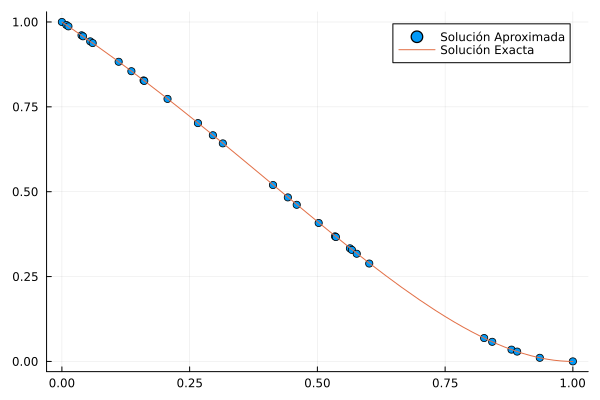

In [9]:
scatter(x, u_h, label = "Solución Aproximada")
plot!(u_exact, label = "Solución Exacta")

### Cálculo de errores de aproximación en norma $L^2$ y la seminorma $H^1$ `refina`

In [10]:
"""
Función que calcula los errores de aproximación en norma L² y la seminorma H¹,
y las tasas de convergencia en ambas normas, para un determinado
números de ciclos de refinamiento. 

Input:
- `nI_approx_init`: número inicial de subintervalos en el mallado.
- `n_cicles`: número de ciclos de refinamiento a realizar.

Output:
- `L²_error_vec`: vector con error en L² para cada ciclo de refinamiento.
- `err_rate_L²`: vector con tasa de convergencia en L² para cada ciclo de refinamiento.
- `H¹_error_vec`: vector con error en H¹ para cada ciclo de refinamiento.
- `err_rate_H¹`: vector con tasa de convergencia en H¹ para cada ciclo de refinamiento.
"""
function refina(nI_approx_init, n_cicles)
    # Construimos un vector que contiene el número total de puntos en el mallado.
    # Para cada ciclo de refinamiento el siguiente contiene el doble de puntos que el anterior
    # El primer ciclo no se refina
    nI_approx_vec = [2^i*nI_approx_init for i in 0:n_cicles-1]
    
    # Vector que contiene el error en L² para cada ciclo de refinamiento
    L²_error_vec = zeros(n_cicles);

    # Vector que contiene el error en H¹ para cada ciclo de refinamiento
    H¹_error_vec = zeros(n_cicles);
    
    # Ciclos de refinamiento
    for k = 1:n_cicles
        # Número de subintervalos en el mallado para aproximar
        nI_approx = nI_approx_vec[k]

        # Nodos de la malla, vector fila
        # Valores aproximados de la función u en los nodos de la malla
        nodes, dofs = solve_u(nI_approx)
        
        # Incialización del error en L² y H¹
        error_L² = 0.0
        error_H¹ = 0.0

        ## Calculo del error ||u - u_h||_2 en la norma L²
        ## Calculo del error ||u' - u'_h||_2 en la seminorma H¹
        for i = 1:nI_approx
            errorL², errorH¹ = error_elemento(nodes, dofs, i)
            error_L² += errorL²
            error_H¹ += errorH¹
        end
        error_L² = sqrt(error_L²)
        error_H¹ = sqrt(error_H¹)
        L²_error_vec[k] = error_L²
        H¹_error_vec[k] = error_H¹
    end
    
    # Cálculo de la tasa de convergencia
    err_rate_L² = zeros(n_cicles)
    err_rate_L²[1] = 1
    err_rate_H¹ = zeros(n_cicles)
    err_rate_H¹[1] = 1

    for i = 2:n_cicles
        err_rate_L²[i] = log(L²_error_vec[i]/L²_error_vec[i-1])/log(1/2)
        err_rate_H¹[i] = log(H¹_error_vec[i]/H¹_error_vec[i-1])/log(1/2)
    end
    return nI_approx_vec, L²_error_vec, err_rate_L², H¹_error_vec, err_rate_H¹
end

refina

### Impresión de la tabla de resultados `tabla`

In [11]:
using Printf
function tabla(nI, L², r_L², H¹, r_H¹)
    # Impresión de la tabla de resultados
    println("     n   L²_error   L²_err_rate   H¹_error   H¹_err_rate\n")
        s = @sprintf "| %4d | %1.3e | %1.4e | %1.3e | %1.4e |" nI[1] L²[1] r_L²[1] H¹[1] r_H¹[1];
        println(s)
    for i = 2:n_cicles
        s = @sprintf "| %4d | %1.3e | %1.4e | %1.3e | %1.4e |" nI[i] L²[i] r_L²[i] H¹[i] r_H¹[i];
        println(s)
    end
end

tabla (generic function with 1 method)

In [12]:
# Numero inicial de subintervalos en el mallado
nI_approx_init = 10
# Número de ciclos que corre el algoritmo numérico
n_cicles = 8

8

In [13]:
nI, L², r_L², H¹, r_H¹ = refina(nI_approx_init, n_cicles);  

tabla(nI, L², r_L², H¹, r_H¹)

     n   L²_error   L²_err_rate   H¹_error   H¹_err_rate

|   10 | 1.685e-03 | 1.0000e+00 | 5.948e-02 | 1.0000e+00 |
|   20 | 4.232e-04 | 1.9935e+00 | 2.986e-02 | 9.9406e-01 |
|   40 | 1.059e-04 | 1.9984e+00 | 1.495e-02 | 9.9852e-01 |
|   80 | 2.649e-05 | 1.9996e+00 | 7.475e-03 | 9.9963e-01 |
|  160 | 6.623e-06 | 1.9999e+00 | 3.738e-03 | 9.9991e-01 |
|  320 | 1.656e-06 | 2.0000e+00 | 1.869e-03 | 9.9998e-01 |
|  640 | 4.139e-07 | 2.0000e+00 | 9.344e-04 | 9.9999e-01 |
| 1280 | 1.035e-07 | 2.0000e+00 | 4.672e-04 | 1.0000e+00 |
